In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes= pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape


(768, 9)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


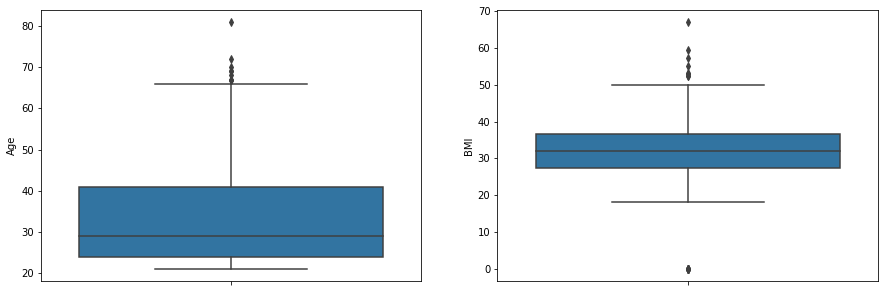

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=diabetes['Age'])

plt.subplot(1,2,2)
sns.boxplot(y=diabetes['BMI'])
plt.show()

In [6]:
diabetes['Age'].value_counts(normalize=True)

22    0.093750
21    0.082031
25    0.062500
24    0.059896
23    0.049479
28    0.045573
26    0.042969
27    0.041667
29    0.037760
31    0.031250
41    0.028646
30    0.027344
37    0.024740
42    0.023438
33    0.022135
38    0.020833
36    0.020833
32    0.020833
45    0.019531
34    0.018229
46    0.016927
43    0.016927
40    0.016927
39    0.015625
35    0.013021
50    0.010417
51    0.010417
52    0.010417
44    0.010417
58    0.009115
47    0.007812
54    0.007812
49    0.006510
48    0.006510
57    0.006510
53    0.006510
60    0.006510
66    0.005208
63    0.005208
62    0.005208
55    0.005208
67    0.003906
56    0.003906
59    0.003906
65    0.003906
69    0.002604
61    0.002604
72    0.001302
81    0.001302
64    0.001302
70    0.001302
68    0.001302
Name: Age, dtype: float64

In [7]:
q1,q2=diabetes['Age'].quantile([.25,.75])
IQR=q2-q1
ll=q1-1.5*(IQR)
ul=q2+1.5*(IQR)

In [8]:
ul

66.5

In [9]:
ll

-1.5

In [10]:
df=diabetes[diabetes['Age']>ul]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [11]:
print(df.columns)
df['Age'].count()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


9

In [12]:
df['Age'].value_counts(normalize=True)


67    0.333333
69    0.222222
72    0.111111
81    0.111111
70    0.111111
68    0.111111
Name: Age, dtype: float64

In [13]:
diabetes['Age']=np.where(diabetes['Age']>ul,ul,diabetes['Age'])

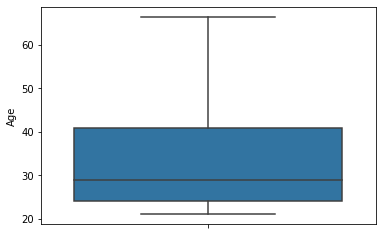

In [14]:
sns.boxplot(y=diabetes['Age'])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [17]:
x=diabetes['Age']
y=diabetes['Pregnancies']

In [18]:
print(type(y))


<class 'pandas.core.series.Series'>


In [19]:
print(y.value_counts())
print(y.isnull().sum())
print(len(x), len(y))


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
0
768 768


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [21]:
print(x_train.shape)

(537,)


In [22]:
print(x_test.shape)

(231,)


In [23]:
print(y_train.value_counts().round(2))
print(y_test.value_counts(normalize=True).round(2))

1     99
2     68
0     64
3     58
4     48
5     40
6     37
8     30
7     29
9     20
10    18
13     9
11     8
12     7
15     1
17     1
Name: Pregnancies, dtype: int64
0     0.20
1     0.16
2     0.15
4     0.09
5     0.07
3     0.07
7     0.07
6     0.06
8     0.03
9     0.03
10    0.03
11    0.01
14    0.01
12    0.01
13    0.00
Name: Pregnancies, dtype: float64


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [28]:
print(x_train.shape, y_train.shape)
print(x_train.isnull().sum())
print(y_train.isnull().sum())



(537,) (537,)
0
0


In [31]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LogisticRegression()

In [34]:
# Reshape x_test to a 2D array
x_test_reshaped = x_test.values.reshape(-1, 1)

# Make predictions
y_pred = lr.predict(x_test_reshaped)


In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
confusion_matrix(y_test,y_pred)

array([[ 0, 43,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  1,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  3,  3,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  1,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1